<a href="https://colab.research.google.com/github/mohripan/Machine-Learning/blob/main/GansMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch, pdb
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
from tqdm.auto import tqdm
from torch.utils.data import DataLoader, Dataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
def show(tensor, channels=1, size=(28, 28), num=16):
  data = tensor.detach().cpu().view(-1, channels, *size)
  grid = make_grid(data[:num], nrow=4).permute(1, 2, 0)
  plt.imshow(grid)

In [65]:
num_epochs = 15
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 64
lr = 0.00001
criterion = nn.BCEWithLogitsLoss()
batch_size = 128
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataloader = DataLoader(datasets.MNIST('.', download=True, transform=transforms.ToTensor()), shuffle=True, batch_size=batch_size)

In [66]:
class Generator(nn.Module):
  def __init__(self, z_dim=64, i_dim=784):
    super(Generator, self).__init__()
    self.gen = nn.Sequential(
        self.gen_block(z_dim, 128),
        self.gen_block(128, 256),
        self.gen_block(256, 512),
        self.gen_block(512, 1024),
        nn.Linear(1024, i_dim),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.gen(x)

  def gen_block(self, input, output):
    return nn.Sequential(nn.Linear(input, output),
                         nn.BatchNorm1d(output),
                         nn.ReLU(inplace=True))

In [67]:
class Discriminator(nn.Module):
  def __init__(self, i_dim=784):
    super(Discriminator, self).__init__()
    self.disc = nn.Sequential(
        self.disc_block(i_dim, 1024),
        self.disc_block(1024, 512),
        self.disc_block(512, 256),
        nn.Linear(256, 1)
    )

  def forward(self, x):
    return self.disc(x)

  def disc_block(self, input, output):
    return nn.Sequential(nn.Linear(input, output),
                         nn.LeakyReLU(0.2))

In [68]:
def gen_noise(number, z_dim):
  return torch.randn(number, z_dim).to(device)

In [69]:
gen = Generator(z_dim).to(device)
gen_opt = optim.Adam(gen.parameters(), lr=lr)
disc = Discriminator().to(device)
disc_opt = optim.Adam(disc.parameters(), lr=lr)

In [70]:
x, y = next(iter(dataloader))

torch.Size([128, 1, 28, 28]) torch.Size([128])
tensor([3, 8, 9, 7, 2, 6, 0, 2, 0, 5])


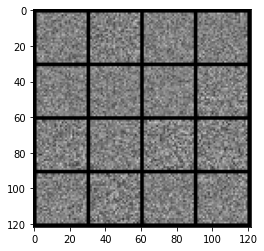

In [71]:
print(x.shape, y.shape)
print(y[:10])

noise = gen_noise(batch_size, z_dim)
fake = gen(noise)
show(fake)

In [72]:
def calc_gen_loss(loss_func, gen, disc, number, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  pred = disc(fake)
  target = torch.ones_like(pred)
  gen_loss = loss_func(pred, target)
  return gen_loss

def calc_disc_loss(loss_func, gen, disc, number, real, z_dim):
  noise = gen_noise(number, z_dim)
  fake = gen(noise)
  disc_fake = disc(fake.detach())
  disc_fake_targets = torch.zeros_like(disc_fake)
  disc_fake_loss = loss_func(disc_fake, disc_fake_targets)

  disc_real = disc(real)
  disc_real_targets = torch.ones_like(disc_real)
  disc_real_loss = loss_func(disc_real, disc_real_targets)

  disc_loss = (disc_fake_loss+disc_real_loss)/2
  return disc_loss

  0%|          | 0/469 [00:00<?, ?it/s]

1, step: 300 / Gen Loss: 2.00912273466587 / Disc Loss: 0.3455388048291204


  0%|          | 0/469 [00:00<?, ?it/s]

2, step: 600 / Gen Loss: 3.5889483261108386 / Disc Loss: 0.11248985037207608
2, step: 900 / Gen Loss: 3.6467170381546037 / Disc Loss: 0.04843617080400393


  0%|          | 0/469 [00:00<?, ?it/s]

3, step: 1200 / Gen Loss: 3.745974618593853 / Disc Loss: 0.030781505511452763


  0%|          | 0/469 [00:00<?, ?it/s]

4, step: 1500 / Gen Loss: 3.560122969150542 / Disc Loss: 0.037769452941914375
4, step: 1800 / Gen Loss: 3.326798621813456 / Disc Loss: 0.05433277261753877


  0%|          | 0/469 [00:00<?, ?it/s]

5, step: 2100 / Gen Loss: 3.469986418088278 / Disc Loss: 0.05532073786482218


  0%|          | 0/469 [00:00<?, ?it/s]

6, step: 2400 / Gen Loss: 3.688460874557496 / Disc Loss: 0.04344887618596357
6, step: 2700 / Gen Loss: 4.100509188969929 / Disc Loss: 0.0343730657423536


  0%|          | 0/469 [00:00<?, ?it/s]

7, step: 3000 / Gen Loss: 4.419327596028648 / Disc Loss: 0.029738771679500755


  0%|          | 0/469 [00:00<?, ?it/s]

8, step: 3300 / Gen Loss: 4.673092093467713 / Disc Loss: 0.025198564228291323
8, step: 3600 / Gen Loss: 5.26232099533081 / Disc Loss: 0.023573090086380637


  0%|          | 0/469 [00:00<?, ?it/s]

9, step: 3900 / Gen Loss: 5.46256008942922 / Disc Loss: 0.022960174738739948
9, step: 4200 / Gen Loss: 5.537247678438819 / Disc Loss: 0.02482861392199993


  0%|          | 0/469 [00:00<?, ?it/s]

10, step: 4500 / Gen Loss: 5.642741614977518 / Disc Loss: 0.02693323401423792


  0%|          | 0/469 [00:00<?, ?it/s]

11, step: 4800 / Gen Loss: 5.687776196797691 / Disc Loss: 0.023723062877543267
11, step: 5100 / Gen Loss: 5.6071094783147135 / Disc Loss: 0.019466017546753096


  0%|          | 0/469 [00:00<?, ?it/s]

12, step: 5400 / Gen Loss: 5.8582390975952165 / Disc Loss: 0.013752885336677232


  0%|          | 0/469 [00:00<?, ?it/s]

13, step: 5700 / Gen Loss: 6.100082391103108 / Disc Loss: 0.011284234192377578
13, step: 6000 / Gen Loss: 6.231398364702865 / Disc Loss: 0.012172070764936498


  0%|          | 0/469 [00:00<?, ?it/s]

14, step: 6300 / Gen Loss: 6.594352253278104 / Disc Loss: 0.009091423403006045


  0%|          | 0/469 [00:00<?, ?it/s]

15, step: 6600 / Gen Loss: 7.087167050043745 / Disc Loss: 0.009138445269005995
15, step: 6900 / Gen Loss: 6.7174203983942675 / Disc Loss: 0.01022249669302255


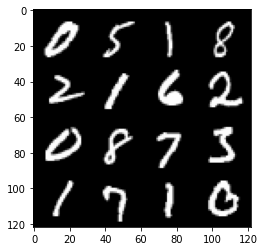

In [73]:
for i in range(num_epochs):
  for real, _ in tqdm(dataloader):
    disc_opt.zero_grad()
    cur_batch_size = len(real)
    real = real.view(cur_batch_size, -1).to(device)
    disc_loss = calc_disc_loss(criterion, gen, disc, cur_batch_size, real, z_dim)

    disc_loss.backward(retain_graph=True)
    disc_opt.step()

    gen_opt.zero_grad()
    gen_loss = calc_gen_loss(criterion, gen, disc, cur_batch_size, z_dim)
    gen_loss.backward(retain_graph=True)
    gen_opt.step()

    mean_disc_loss += disc_loss.item()/info_step
    mean_gen_loss += gen_loss.item()/info_step

    if cur_step % info_step == 0 and cur_step > 0:
      fake_noise = gen_noise(cur_batch_size, z_dim)
      fake = gen(fake_noise)
      show(fake)
      show(real)
      print(f'{i+1}, step: {cur_step} / Gen Loss: {mean_gen_loss} / Disc Loss: {mean_disc_loss}')
      mean_gen_loss, mean_disc_loss = 0,0
    cur_step+=1

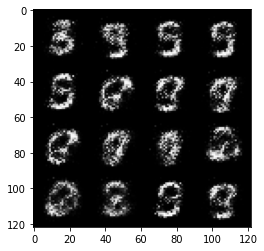